<a href="https://colab.research.google.com/github/vifirsanova/hse-python-course/blob/main/workbook/5_nlp_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка
В этом воркбуке мы познакомимся с библиотеками для обработки естественного языка и отработаем цикл FOR.

**HuggingFace Datasets**

HuggingFace - платформа для работы с моделями с архитектурой Transformer для обработки текстов и не только!

Datasets дает доступ к коллекциям данных и позволяет создавать свои наборы для машинного обучения.

`pip install` - команда shell для загрузки библиотеки

`-q` - параметр "quiet", не выводит не экран подробную информацию о процессе загрузки библиотеки

`!` - символ для объявления shell-команд

In [1]:
!pip install -q datasets


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip


Загрузим датасет для анализа тональности текстов

In [4]:
from datasets import load_dataset

dataset = load_dataset("Sp1786/multiclass-sentiment-analysis-dataset")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Проведем анализ!

Структура объекта dataset довольно сложная, но удобная для интерпретации.

У нас есть 3 выборки: train, validation и test.

В каждой выборке 4 столбца:

- ID элемента датасета, он нужен, чтобы все значения были уникальными, как в реляционной БД
- text, label, sentiment

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 31232
    })
    validation: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5205
    })
    test: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5206
    })
})

Обычно для обработки таких данных используется библиотека pandas, но пока мы учимся, будем использовать нативный метод - цикл FOR.

#**Задание 1**

Для начала проверим, сбалансирован ли наш датасет.

In [6]:
# Какие метки есть в датасете?

# Создаем множество set()
# Множество - это список уникальных элементов
# Этот тип данных можно использовать как фильтр для наших меток
unique_labels = set()

# Для каждого уникального элемента из обучающей выборки dataset['train']
# Добавим элемент в множество unique_labels
for i in dataset['train']:
  unique_labels.add(i['sentiment'])

unique_labels

{'negative', 'neutral', 'positive'}

In [15]:
# Теперь посчитаем, сколько представителей каждой метки в выборках train, validation и test
# Подсказки:
# - создайте пустые переменные, куда вы будете вносить количество меток
# - используйте цикл for и условия if
# - обновляйте значения переменных методом счетчика (каждое новое совпадение: counter += 1)
# - выведите на экран значения переменных для каждой из трех выборок

train_positive = 0
train_negative = 0
train_neutral = 0

validation_positive = 0
validation_negative = 0
validation_neutral = 0

test_positive = 0
test_negative = 0
test_neutral = 0

for i in dataset['train']:
    if i['sentiment'] == 'positive':
        train_positive += 1
    elif i['sentiment'] == 'negative':
        train_negative += 1
    elif i['sentiment'] == 'neutral':
        train_neutral += 1

for i in dataset['validation']:
    if i['sentiment'] == 'positive':
        validation_positive += 1
    elif i['sentiment'] == 'negative':
        validation_negative += 1
    elif i['sentiment'] == 'neutral':
        validation_neutral += 1

for i in dataset['test']:
    if i['sentiment'] == 'positive':
        test_positive += 1
    elif i['sentiment'] == 'negative':
        test_negative += 1
    elif i['sentiment'] == 'neutral':
        test_neutral += 1

print('Данные обучающей выборки\n---')
print('Положительные метки:', train_positive)
print('Отрицательне метки:', train_negative)
print('Нейтральные метки:', train_neutral)

print('Данные проверочной выборки\n---')
print('Положительные метки:', validation_positive)
print('Отрицательне метки:', validation_negative)
print('Нейтральные метки:', validation_neutral)

print('Данные тестовой выборки\n---')
print('Положительные метки:', test_positive)
print('Отрицательне метки:', test_negative)
print('Нейтральные метки:', test_neutral)

Данные обучающей выборки
---
Положительные метки: 10478
Отрицательне метки: 9105
Нейтральные метки: 11649
Данные проверочной выборки
---
Положительные метки: 1760
Отрицательне метки: 1517
Нейтральные метки: 1928
Данные тестовой выборки
---
Положительные метки: 1730
Отрицательне метки: 1546
Нейтральные метки: 1930


In [34]:
# Используйте арифметические операции, чтобы посчитать процентное соотношение или долю каждого класса в каждой выборке

train_positive_persent = round(train_positive / len(dataset['train']) * 100)
train_negative_persent = round(train_negative / len(dataset['train']) * 100)
train_neutral_persent = round(train_neutral / len(dataset['train']) * 100)

validation_positive_persent = round(validation_positive / len(dataset['validation']) * 100)
validation_negative_persent = round(validation_negative / len(dataset['validation']) * 100)
validation_neutral_persent = round(validation_neutral / len(dataset['validation']) * 100)

test_positive_persent = round(test_positive / len(dataset['test']) * 100)
test_negative_persent = round(test_negative / len(dataset['test']) * 100)
test_neutral_persent = round(test_neutral / len(dataset['test']) * 100)

print('Положительные метки составляют', train_positive_persent, '% от обучающей выборки')
print('Отрицательне метки составляют', train_negative_persent, '% от обучающей выборки')
print('Нейтральные метки составляют', train_neutral_persent, '% от обучающей выборки')

print('\nПоложительные метки составляют', validation_positive_persent, '% от проверочной выборки')
print('Отрицательне метки составляют', validation_negative_persent, '% от проверочной выборки')
print('Нейтральные метки составляют', validation_neutral_persent, '% от проверочной выборки')

print('\nПоложительные метки составляют', test_positive_persent, '% от тестовой выборки')
print('Отрицательне метки составляют', test_negative_persent, '% от тестовой выборки')
print('Нейтральные метки составляют', test_neutral_persent, '% от тестовой выборки')

Положительные метки составляют 34 % от обучающей выборки
Отрицательне метки составляют 29 % от обучающей выборки
Нейтральные метки составляют 37 % от обучающей выборки

Положительные метки составляют 34 % от проверочной выборки
Отрицательне метки составляют 29 % от проверочной выборки
Нейтральные метки составляют 37 % от проверочной выборки

Положительные метки составляют 33 % от тестовой выборки
Отрицательне метки составляют 30 % от тестовой выборки
Нейтральные метки составляют 37 % от тестовой выборки


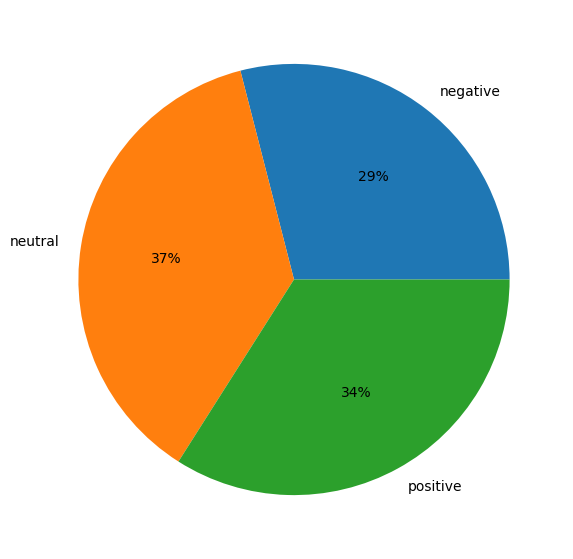

In [32]:
# Создадим визуализацию
# Будем работать с библиотекой matplotlip
# Numpy - библиотека для обработки массивов данных - обеспечивает работу matplotlib
from matplotlib import pyplot as plt
import numpy as np

# Задаем список меток
labels = ['negative', 'neutral', 'positive']
# Задаем значения для каждой метки, процентное соотношение (только для обучающей выборки)
data = [train_negative_persent, train_neutral_persent, train_positive_persent]

# Код для отрисовки круговой диаграммы
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%') # autopict создает числовые подписи и использует целочисленное форматирование

# Показать график
plt.show()

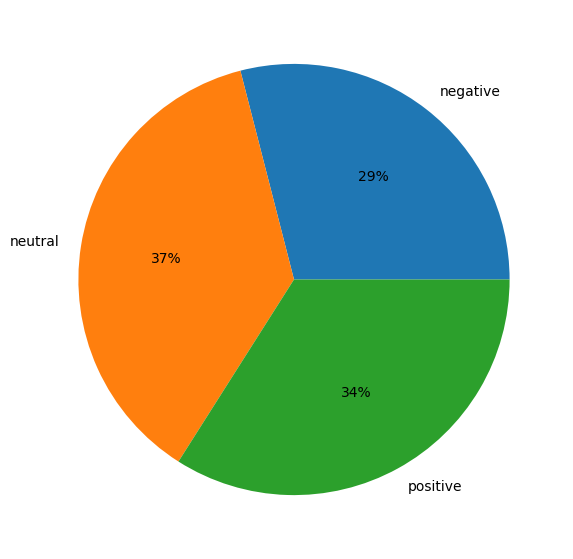

In [33]:
# Сделаем то же самое для проверочной выборки

labels = ['negative', 'neutral', 'positive']
data = [validation_negative_persent, validation_neutral_persent, validation_positive_persent]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%')

plt.show()

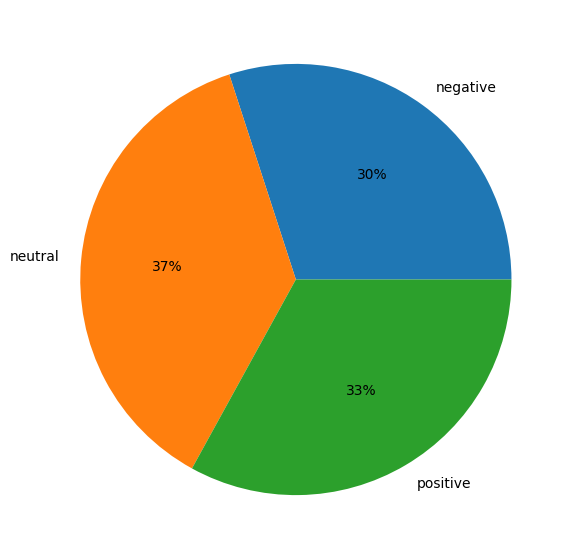

In [35]:
# Сделаем то же самое для тестовой выборки

labels = ['negative', 'neutral', 'positive']
data = [test_negative_persent, test_neutral_persent, test_positive_persent]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%')

plt.show()

#**Задание 2**

Займемся обработкой естественного языка.

Познакомимся с библиотекой SpaCy для обработки текстов.

In [57]:
!pip install spacy

import spacy.cli
spacy.cli.download("en_core_web_sm")


[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip


In [58]:
# Загрузка spaCy
import spacy

# Загрузка библиотеки для визуализации spaCy
from spacy import displacy

# Инициализация инструментов SpaCy для английского (для каждого языка загружается свой вариант)
nlp = spacy.load('en_core_web_sm')

# Выведем доступные инструменты
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


Токенизация SpaCy производится с помощью цикла for

In [59]:
# Образец текста из нашего датасета
sample = dataset['train'][0]['text']
sample

'Cooking microwave pizzas, yummy'

In [60]:
# Для работы со SpaCy, _нужно_ привести все к нужному виду
# Для этого загружаем в nlp наш текст
doc = nlp(sample)
doc # Визуально ничего не изменилось, но теперь это объект класса SpaCy, который можно обработать инструментами NLP

Cooking microwave pizzas, yummy

In [61]:
# Токенизация
for token in doc:
    print(token.text)

Cooking
microwave
pizzas
,
yummy


In [62]:
# Частересная разметка
for token in doc:
    print(token.pos_)

VERB
NOUN
NOUN
PUNCT
ADJ


In [63]:
# Лемматизация
for token in doc:
    print(token.lemma_)

cook
microwave
pizza
,
yummy


In [64]:
# Синтаксическая роль (составляющие)
for token in doc:
    print(token.tag_)

VBG
NN
NNS
,
JJ


In [65]:
# Синтаксическая роль (зависимости)
for token in doc:

    print(token.dep_)

amod
compound
ROOT
punct
amod


In [66]:
# Морфологическая разметка
for token in doc:
    print(token.morph)

Aspect=Prog|Tense=Pres|VerbForm=Part
Number=Sing
Number=Plur
PunctType=Comm
Degree=Pos


Задание!

1. Сохраним в отдельную переменную список текстов из тестовой выборки

In [81]:
### ваш код здесь ###
test_texts = [i['text'] for i in dataset['test']]
test_texts[:5]

['getting cds ready for tour',
 ' MC, happy mother`s day to your mom ;).. love yah',
 'A year from now is graduation....i am pretty sure i`m not ready for it!?!?!?',
 ' because you had chips and sale w/o me',
 'Great for organising my work life balance']

2. Создадим список токенов для каждого текста с помощью SpaCy

In [83]:
docs = [nlp(text) for text in test_texts[:100]]

tokens = [token.text.split() for token in docs]

# Не забудьте применить nlp!
# Выведите первые 5 текстов
# Обработка может занять много времени, достаточно обработать первые 100 текстов
tokens[:5]

[['getting', 'cds', 'ready', 'for', 'tour'],
 ['MC,',
  'happy',
  'mother`s',
  'day',
  'to',
  'your',
  'mom',
  ';)..',
  'love',
  'yah'],
 ['A',
  'year',
  'from',
  'now',
  'is',
  'graduation....i',
  'am',
  'pretty',
  'sure',
  'i`m',
  'not',
  'ready',
  'for',
  'it!?!?!?'],
 ['because', 'you', 'had', 'chips', 'and', 'sale', 'w/o', 'me'],
 ['Great', 'for', 'organising', 'my', 'work', 'life', 'balance']]

3. Частеречная разметка: создаем список частей речи для каждого токена

In [86]:
pos = []
for doc in docs:
    pos.append([token.pos_ for token in doc])
pos[:5]

[['VERB', 'NOUN', 'ADJ', 'ADP', 'NOUN'],
 ['SPACE',
  'PROPN',
  'PUNCT',
  'ADJ',
  'PROPN',
  'NOUN',
  'ADP',
  'PRON',
  'NOUN',
  'PUNCT',
  'PUNCT',
  'VERB',
  'INTJ'],
 ['DET',
  'NOUN',
  'ADP',
  'ADV',
  'AUX',
  'NOUN',
  'PUNCT',
  'PRON',
  'AUX',
  'ADV',
  'ADJ',
  'PROPN',
  'PART',
  'ADJ',
  'ADP',
  'PRON',
  'PUNCT',
  'PUNCT',
  'PUNCT',
  'PUNCT',
  'PUNCT',
  'PUNCT'],
 ['SPACE', 'SCONJ', 'PRON', 'VERB', 'NOUN', 'CCONJ', 'NOUN', 'ADP', 'PRON'],
 ['ADJ', 'ADP', 'VERB', 'PRON', 'NOUN', 'NOUN', 'NOUN']]

4. Проверим точность разметки. С помощью range выведем для первых пяти текстов пары "слово - его частеречный тег".

In [90]:
# Это задание сложнее, чем кажется
# Подсказка:
# for i in range(len(list)) - это итерация по _длине_ списка;
# в переменную i сохраняется порядковый номер текущего элемента списка;
# если у нас есть несколько сопоставимых списков одинаковой длины,
# то на каждом шаге итерации мы можем выводить элементы одного порядка из разных списков,
# например for i in range(len(list)) поможет вывести tokens[4] и pos[4] одновременно, в одном блоке кода

for i in range(len(tokens[:5])):
    print('Текст', i)
    for j in range(len(tokens[i])):
        print(tokens[i][j], pos[i][j])
    print() # Выведем перенос строки

Текст 0
getting VERB
cds NOUN
ready ADJ
for ADP
tour NOUN

Текст 1
MC, SPACE
happy PROPN
mother`s PUNCT
day ADJ
to PROPN
your NOUN
mom ADP
;).. PRON
love NOUN
yah PUNCT

Текст 2
A DET
year NOUN
from ADP
now ADV
is AUX
graduation....i NOUN
am PUNCT
pretty PRON
sure AUX
i`m ADV
not ADJ
ready PROPN
for PART
it!?!?!? ADJ

Текст 3
because SPACE
you SCONJ
had PRON
chips VERB
and NOUN
sale CCONJ
w/o NOUN
me ADP

Текст 4
Great ADJ
for ADP
organising VERB
my PRON
work NOUN
life NOUN
balance NOUN



5. Разметка именованных сущностей

Вернемся к списку токенов, который мы создали в пункте 2. Выберем небольшой срез, например тексты 7-19.

In [91]:
# Для каждого текста из выбранного среза: допишите этот код
# Применим к тексту nlp: допишите этот код
for text in docs[7:19]:
  print([(ent, ent.label_) for ent in text.ents]) # Выведем именованную сущность и ее лейбл

[(tweetbud, 'PERSON'), (2890, 'CARDINAL')]
[(first, 'ORDINAL')]
[(today, 'DATE'), (i`m, 'NORP')]
[]
[(Audi, 'PRODUCT')]
[]
[]
[]
[]
[]
[(TY, 'ORG')]
[(recent years, 'DATE')]


Здесь мы используем новый тип данных - кортеж `(entity, label)`

Кортеж очень похож на список. Разница только в том, что кортеж - неизменяемый, т.е. это список, в котором ничего нельзя изменить, удалить или добавить.

Кортежи занимают меньше памяти, т.к. у них меньше свойств. Они защищают данные от изменений и могут применяться в сложных структурах, например, служить ключом для словаря `dict`.

На практике, их удобно применять для разметки данных  методами NLP.

In [95]:
# Выберите любой текст и визуализируйте его разметку именованных сущностей
displacy.render(nlp(dataset['test'][28]['text']), style="ent", jupyter=True)